# ADS-505 Team 4 Final Project

Dingyi Duan, Juliet Sieland-Harris, Katie Hu

10/18/2021

### Problem Statement

This Portuguese banking institution wants to assess the effectiveness of their marketing campaigns, and better predict which consumers are likely to subscribe to a term deposit when conducting future campaigns to best allocate resources.

#### GitHub Repository 
https://github.com/katie-hu/Bank_Marketing

### Exploratory Data Analysis

In [87]:
# Import Libraries

import pandas as pd
import math
import statistics
import seaborn as sns
import datetime
from datetime import date
import matplotlib.pylab as plt
import numpy as np
import statsmodels.api as sm
import random
from matplotlib.pyplot import figure
from sklearn import preprocessing, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary, gainsChart, stepwise_selection, regressionSummary, AIC_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data Set

bank_df = pd.read_csv('Dataset/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Find Number of Columns and Rows in Data Set

bank_df.shape

(4521, 17)

In [4]:
# Find Type of Variables

bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
# Descriptive Statistics

bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Column Names

bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Find any missing values

bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Create new dataframe that will be cleaned

bank = pd.DataFrame(data = bank_df)

In [9]:
# Check positive response

print((bank['y'] == 'yes').sum())

# Check for response rate

print(100*(bank['y'] == 'yes').sum() / len(bank))

521
11.523999115239992


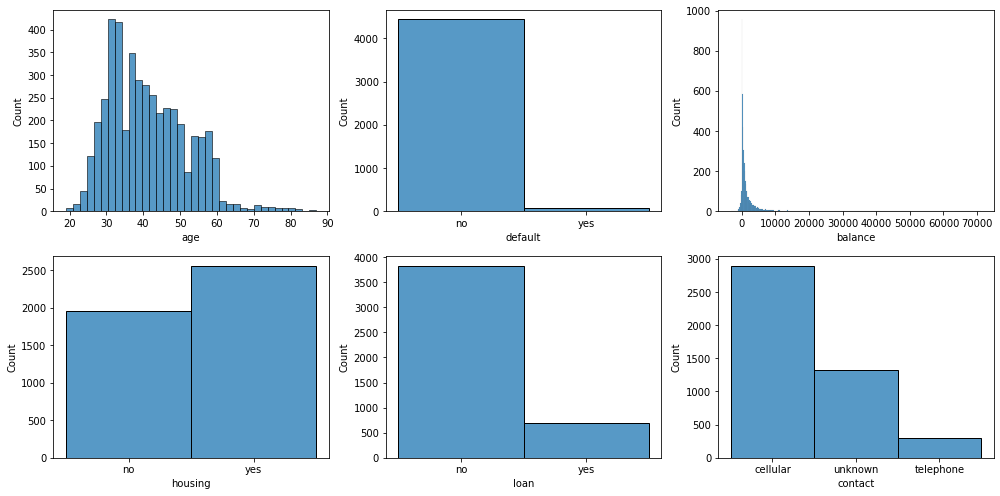

In [10]:
# Look into distribution of variables
%matplotlib inline
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'age', ax = axs[0,0])
sns.histplot(data = bank, x = 'default', ax = axs[0,1])
sns.histplot(data = bank, x = 'balance', ax = axs[0,2])
sns.histplot(data = bank, x = 'housing', ax = axs[1,0])
sns.histplot(data = bank, x = 'loan', ax = axs[1,1])
sns.histplot(data = bank, x = 'contact', ax = axs[1,2])


plt.tight_layout()

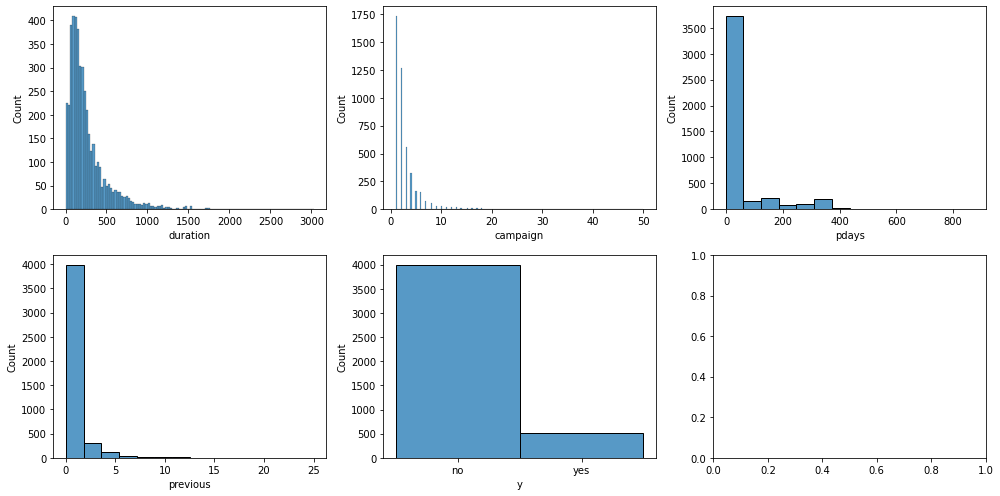

In [11]:
#Look into distribution of variables
f, axs = plt.subplots(2, 3, figsize = (14,7))

sns.histplot(data = bank, x = 'duration', ax = axs[0,0])
sns.histplot(data = bank,x = 'campaign', ax = axs[0,1])
sns.histplot(data = bank, x = 'pdays', ax = axs[0,2])
sns.histplot(data = bank, x = 'previous', ax = axs[1,0])
sns.histplot(data = bank, x = 'y', ax = axs[1,1])

plt.tight_layout()

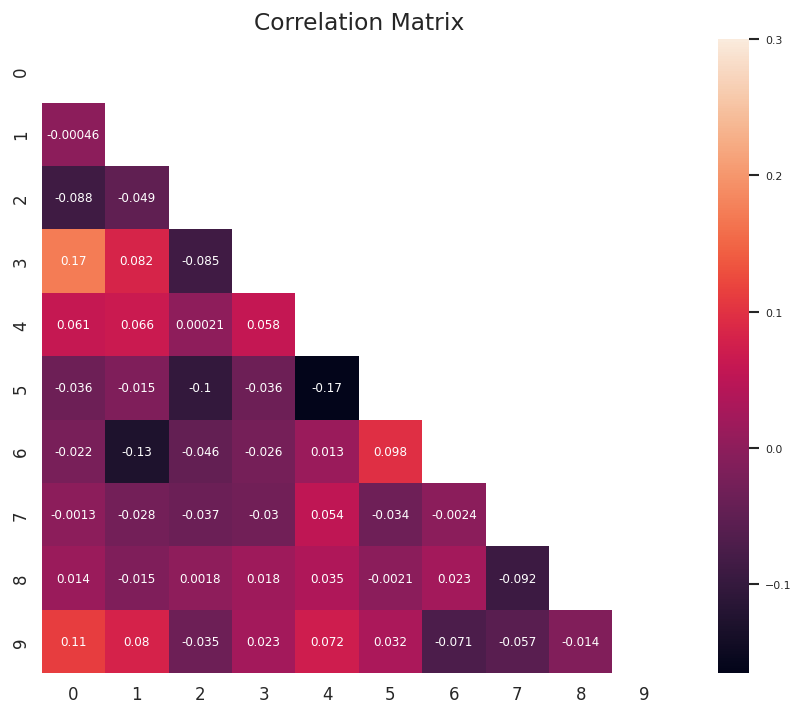

In [12]:
# Find which variables have the highest correlation
%matplotlib inline

corr = np.corrcoef(np.random.randn(10,200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (9,7), dpi = 120)
    sns.set(font_scale = .6)
    ax = sns.heatmap(corr, mask = mask, vmax = .3, square = True, annot = True)
    ax.set_title('Correlation Matrix', fontsize = 14)

In [13]:
# Set Up Normalized Bar Plots for categorical variables

# Marital

crosstab_marital = pd.crosstab(bank['marital'], bank['y'])
crosstab_marital_norm = crosstab_marital.div(crosstab_marital.sum(axis = 1), axis = 0)

# Job

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)

# Education

crosstab_education = pd.crosstab(bank['education'], bank['y'])
crosstab_education_norm = crosstab_education.div(crosstab_education.sum(axis=1), axis = 0)

# Contact

crosstab_contact = pd.crosstab(bank['contact'], bank['y'])
crosstab_contact_norm = crosstab_contact.div(crosstab_contact.sum(axis=1), axis = 0)

# Month

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)

# Day

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)

In [14]:
params = {'legend.fontsize': 12,
         'axes.labelsize': 12,
         'axes.titlesize': 12,}
plt.rcParams.update(params)

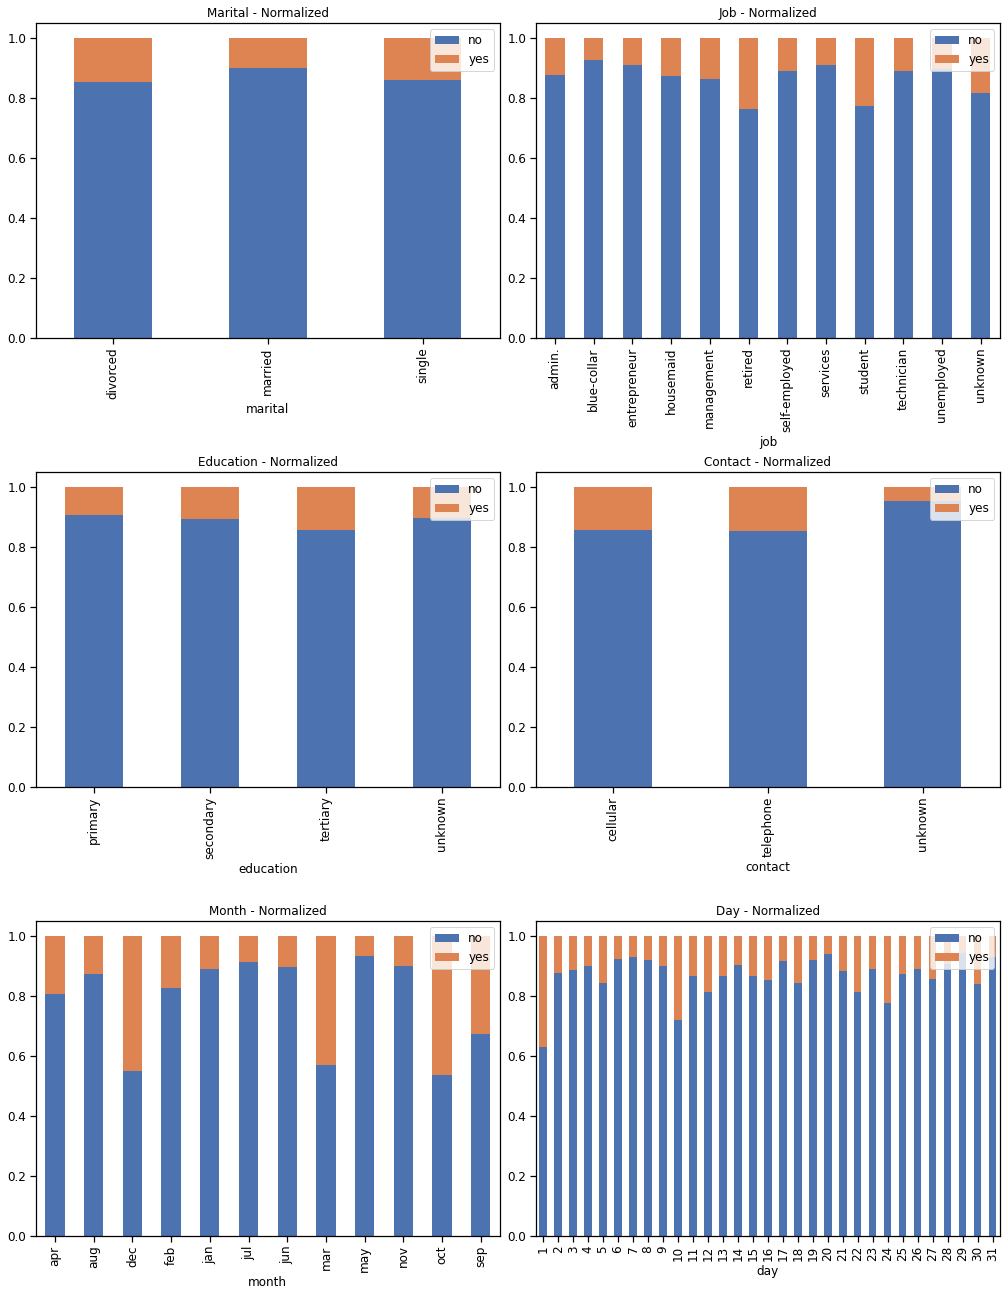

In [15]:
fig = plt.figure(figsize = (14, 18))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

plot_marital = crosstab_marital_norm.plot(kind = 'bar', stacked = True, title = 'Marital - Normalized', fontsize = 12, ax  = ax1)
plot_job = crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Job - Normalized', fontsize = 12, ax  = ax2)
plot_education = crosstab_education_norm.plot(kind = 'bar', stacked = True, title = 'Education - Normalized', fontsize = 12, ax  = ax3)
plot_contact = crosstab_contact_norm.plot(kind = 'bar', stacked = True, title = 'Contact - Normalized', fontsize = 12, ax  = ax4)
plot_month = crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Month - Normalized', fontsize = 12, ax  = ax5)
plot_day = crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Day - Normalized', fontsize = 12, ax  = ax6)

fig.tight_layout(pad = 1)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
ax3.legend(loc = 'upper right')
ax4.legend(loc = 'upper right')
ax5.legend(loc = 'upper right')
ax6.legend(loc = 'upper right')

### Add Details

Based on normalized charts, `job`, `month`, `day`, and `education` stand out needing further exploration. 

Variables `month`, `day`, `job` will be binned and `education`is fairly well-balanced which will changed into ordinal values. `contact` will be turned into nominal values.

### Data Wrangling and Pre-Processing

In [16]:
# Change all yes and no to binary 0,1 values

bank['y'] = (bank['y']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['default'] = (bank['default']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['housing'] = (bank['housing']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['loan'] = (bank['loan']=='yes').astype(int)  # changing yes to 1 and no to 0
bank['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

<AxesSubplot:title={'center':'Binned by Jobs - Normalized'}, xlabel='job'>

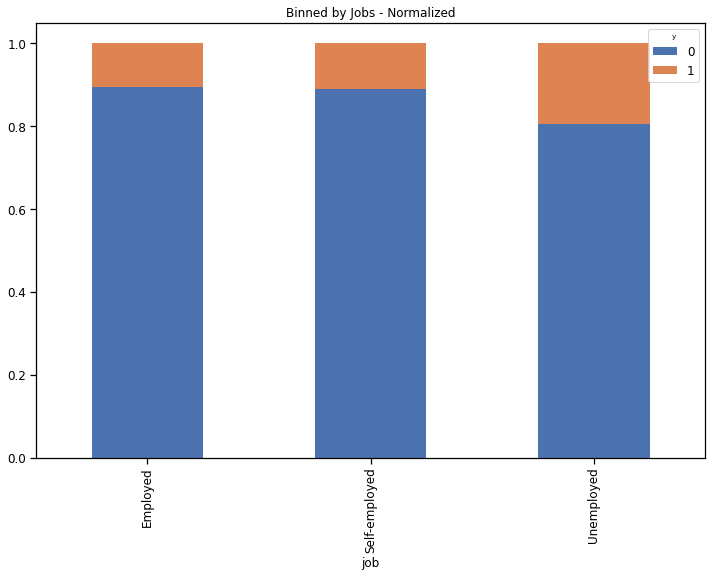

In [17]:
# Bin Jobs into Employed, Unemployed, and Self-Employed
bank['job'] = bank['job'].replace({'management': 'Employed', 'blue-collar': 'Employed',
                                 'technician': 'Employed', 'admin.': 'Employed',
                                 'services': 'Employed', 'retired': 'Unemployed',
                                 'self-employed': 'Self-employed', 'entrepreneur':'Employed',
                                 'unemployed': 'Unemployed', 'housemaid': 'Employed',
                                 'student': 'Unemployed', 'unknown': 'Employed'})

# Normalized Job by Bins Chart

crosstab_job = pd.crosstab(bank['job'], bank['y'])
crosstab_job_norm = crosstab_job.div(crosstab_job.sum(axis=1), axis = 0)
crosstab_job_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Jobs - Normalized', fontsize = 12, figsize = (12, 8))

<AxesSubplot:title={'center':'Binned by Days - Normalized'}, xlabel='day'>

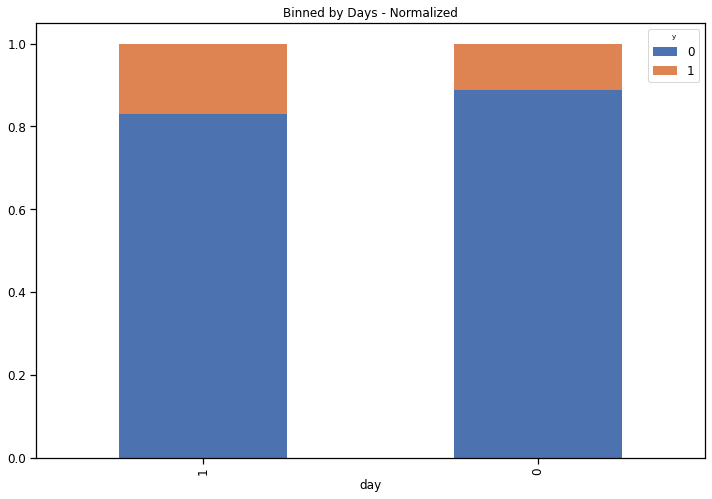

In [18]:
# Change Days to First Day of the Month and All Other Days

b_day = [1, 2, 999]
l_day = ['1', '0']

bank['day'] = pd.to_numeric(bank['day'])
bank['day'] = pd.cut(bank['day'], bins = b_day, labels = l_day, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_day = pd.crosstab(bank['day'], bank['y'])
crosstab_day_norm = crosstab_day.div(crosstab_day.sum(axis=1), axis = 0)
crosstab_day_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Days - Normalized', fontsize = 12, figsize = (12, 8))

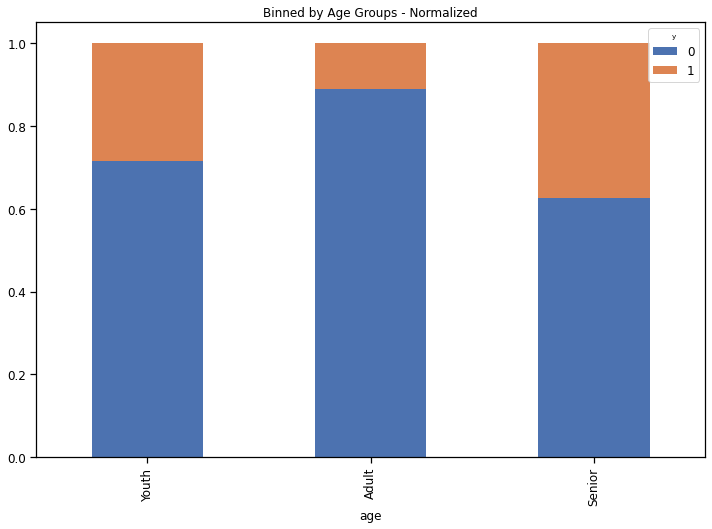

In [19]:
# Change age into groups based on range

b_age = [0, 21, 65, 99999]
l_age = ['Youth', 'Adult', 'Senior']

bank['age'] = pd.to_numeric(bank['age'])
bank['age'] = pd.cut(bank['age'], bins = b_age, labels = l_age, include_lowest = True)

# Normalized Day by Bins Chart

crosstab_age = pd.crosstab(bank['age'], bank['y'])
crosstab_age_norm = crosstab_age.div(crosstab_age.sum(axis=1), axis = 0)
crosstab_age_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Age Groups - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['age'] = bank['age'].replace({'Youth': '0',
                                  'Adult': '1',
                                  'Senior': '2'})

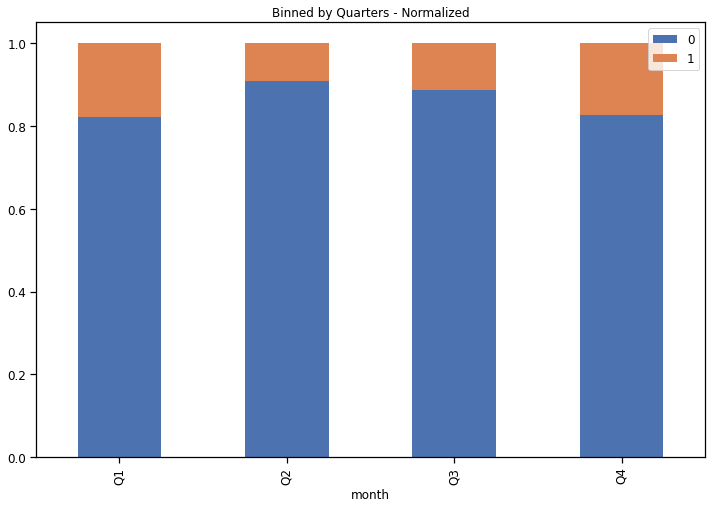

In [20]:
# Change months into groups based on a quarter system

bank['month'] = bank['month'].replace({'jan': '1','feb':'2','mar':'3','apr':'4','may':'5',
                                       'jun':'6','jul':'7','aug':'8','sep':'9','oct':'10',
                                       'nov':'11','dec':'12'
                                  })

bank['month'] = pd.to_numeric(bank['month'])

b_month = [0, 3, 6, 9, 12]
l_month = ['Q1','Q2','Q3','Q4']

bank['month'] = pd.to_numeric(bank['month'])
bank['month'] = pd.cut(bank['month'], bins = b_month, labels = l_month, include_lowest = True)

# Normalized Month by Bins Chart

crosstab_month = pd.crosstab(bank['month'], bank['y'])
crosstab_month_norm = crosstab_month.div(crosstab_month.sum(axis=1), axis = 0)
crosstab_month_norm.plot(kind = 'bar', stacked = True, title = 'Binned by Quarters - Normalized', fontsize = 12, figsize = (12, 8))

# Convert Categories into Numbers

bank['month'] = bank['month'].replace({'Q1': '1',
                                       'Q2': '2',
                                       'Q3': '3',
                                       'Q4': '4'})

plt.legend(loc = 'upper right')

 `job` and `marital` will be turned into dummy variables.

In [21]:
# Turn categorical variables job and marital into dummy variables

cat_df = bank[['job', 'marital']]
dummy = pd.get_dummies(cat_df)

# Merge back into dataset

bank = pd.concat([bank,dummy], axis = 1)

# Drop job and marital original

bank = bank.drop(['job', 'marital'], axis = 1)

In [22]:
# Change pdays to integer and bins

b = [-1, 0, 99999]
l = ['0', '1']

bank['pdays'].astype(int)
bank['pdays'] = pd.cut(bank['pdays'], bins = b, labels = l, include_lowest = True)


# Change Education Variable to Ordinal

bank['education'] = bank['education'].replace({'primary': '0',
                                              'secondary':'0.25',
                                              'tertiary':'0.5',
                                              'unknown':'1'})
bank['education'].astype(float)


# Change Contact and P Outcome to Nominal Values

bank['contact'] = bank['contact'].replace({'cellular': '0',
                                           'telephone':'1',
                                           'unknown':'2'
                                  })

bank['poutcome'] = bank['poutcome'].replace({'failure': '0',
                                             'other':'1',
                                             'success':'2',
                                             'unknown':'3'
                                  })

In [23]:
# Change Variable of 'y' to 'deposit'

bank = bank.rename(columns = {'y': 'deposit'})

In [24]:
# Set Predictors and Outcome

predictors = list(bank.columns)
outcome = 'deposit'
predictors.remove(outcome)

### Data Splitting

Parameters: 
- Train .4
- Valid .35
- Test .25
- Random State 1

In [25]:
# Helper Functions

def confusionMatrices(model, title):
    print(title + ' - training results')
    classificationSummary(train_y, model.predict(train_X))
    print(title + ' - validation results')
    valid_pred = model.predict(valid_X)
    classificationSummary(valid_y, valid_pred)

In [26]:
# Train, Valid, Test Split Data

train, temp = train_test_split(bank, train_size=1700, random_state=1)
valid, test = train_test_split(temp, train_size=1488, random_state=1)

print('Training   : ', train.shape)
print('Validation : ', valid.shape)
print('Test : ', test.shape)

Training   :  (1700, 21)
Validation :  (1488, 21)
Test :  (1333, 21)


In [27]:
# Set Variables

train_X = train.drop(['deposit'], 1)
train_y = train['deposit']

valid_X = valid.drop(['deposit'], 1)
valid_y = valid['deposit']

test_X = test.drop(['deposit'], 1)
test_y = test['deposit']

In [28]:
#Standardization

# train
train_X = StandardScaler().fit_transform(train_X)

# valid
valid_X = StandardScaler().fit_transform(valid_X)

# test
test_X = StandardScaler().fit_transform(test_X)

### Model Strategies

- Logistic Regression
- Decision Tree
- Bagging
- Boosting
- Random Forest
- Neural Network 1
- Neural Network 2
- Linear Discriminant Analysis

### Logistic Regression

In [29]:
logit_reg = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg.fit(train_X, train_y)
confusionMatrices(logit_reg, 'Logistic regression')

Logistic regression - training results
Confusion Matrix (Accuracy 0.9047)

       Prediction
Actual    0    1
     0 1470   30
     1  132   68
Logistic regression - validation results
Confusion Matrix (Accuracy 0.8972)

       Prediction
Actual    0    1
     0 1280   37
     1  116   55


### Classification Tree

In [30]:
dTree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
dTree.fit(train_X, train_y)
confusionMatrices(dTree, 'Decision Tree')

Decision Tree - training results
Confusion Matrix (Accuracy 0.9047)

       Prediction
Actual    0    1
     0 1490   10
     1  152   48
Decision Tree - validation results
Confusion Matrix (Accuracy 0.8905)

       Prediction
Actual    0    1
     0 1299   18
     1  145   26


### Bagging

In [31]:
bagging = BaggingClassifier(dTree, max_samples = 0.5, max_features = 0.5)
bagging.fit(train_X, train_y)
confusionMatrices(bagging, 'Bagged Decision Tree')

Bagged Decision Tree - training results
Confusion Matrix (Accuracy 0.9035)

       Prediction
Actual    0    1
     0 1497    3
     1  161   39
Bagged Decision Tree - validation results
Confusion Matrix (Accuracy 0.8911)

       Prediction
Actual    0    1
     0 1300   17
     1  145   26


### Adaboost

In [32]:
adaboost = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree)
adaboost.fit(train_X, train_y)
confusionMatrices(adaboost, 'Boosted Decision Tree')

Boosted Decision Tree - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1500    0
     1    0  200
Boosted Decision Tree - validation results
Confusion Matrix (Accuracy 0.8602)

       Prediction
Actual    0    1
     0 1222   95
     1  113   58


### Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(train_X, train_y)
confusionMatrices(rf, 'Random Forest Classifier')

Random Forest Classifier - training results
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1500    0
     1    0  200
Random Forest Classifier - validation results
Confusion Matrix (Accuracy 0.8858)

       Prediction
Actual    0    1
     0 1279   38
     1  132   39


### Neural Network

#### Option 1

In [34]:
param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet1 = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch = GridSearchCV(neuralNet1, param_grid, cv = 5, n_jobs = -1)
gridSearch.fit(train_X, train_y)
neuralNet1 = gridSearch.best_estimator_

confusionMatrices(gridSearch, 'Neural Network')

Neural Network - training results
Confusion Matrix (Accuracy 0.9171)

       Prediction
Actual    0    1
     0 1469   31
     1  110   90
Neural Network - validation results
Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual    0    1
     0 1259   58
     1  117   54


#### Option 2

In [35]:
scaleInput = MinMaxScaler()
scaleInput.fit(train_X * 1.0)

neuralNet2 = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', solver = 'lbfgs', max_iter = 5000,
                          random_state = 1)
neuralNet2.fit(scaleInput.transform(train_X), train_y)

print('Neural Network - Training results')
classificationSummary(train_y, neuralNet2.predict(scaleInput.transform(train_X)))
print('Neural Network - Validation results')
classificationSummary(valid_y, neuralNet2.predict(scaleInput.transform(valid_X)))

Neural Network - Training results
Confusion Matrix (Accuracy 0.9476)

       Prediction
Actual    0    1
     0 1478   22
     1   67  133
Neural Network - Validation results
Confusion Matrix (Accuracy 0.8777)

       Prediction
Actual    0    1
     0 1252   65
     1  117   54


### Linear Discriminant Analysis

In [36]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(train_X, train_y)
LDA_confusion = confusionMatrices(LDA, 'Linear Discriminant Analysis')

Linear Discriminant Analysis - training results
Confusion Matrix (Accuracy 0.9041)

       Prediction
Actual    0    1
     0 1448   52
     1  111   89
Linear Discriminant Analysis - validation results
Confusion Matrix (Accuracy 0.8905)

       Prediction
Actual    0    1
     0 1262   55
     1  108   63


### Accuracy Score

In [37]:
def accuracy(model):
    
    accuracy_train = accuracy_score(train_y, model.predict(train_X))
    accuracy_valid = accuracy_score(valid_y, model.predict(valid_X))
    
    return round(accuracy_train,3), round(accuracy_valid,3)

print('Accuracy score for Logistic Regression is:', accuracy(logit_reg))
print('Accuracy score for Decision Tree is:', accuracy(dTree))
print('Accuracy score for Bagging is:', accuracy(bagging))
print('Accuracy score for Boosting is:', accuracy(adaboost))
print('Accuracy score for Random Forest is:', accuracy(rf))
print('Accuracy score for Neural Network Option 1 is:', accuracy(gridSearch))
print('Accuracy score for Neural Network Option 2 is:', accuracy(neuralNet2))
print('Accuracy score for Linear Discriminant Analysis is:', accuracy(LDA))

Accuracy score for Logistic Regression is: (0.905, 0.897)
Accuracy score for Decision Tree is: (0.905, 0.89)
Accuracy score for Bagging is: (0.904, 0.891)
Accuracy score for Boosting is: (1.0, 0.86)
Accuracy score for Random Forest is: (1.0, 0.886)
Accuracy score for Neural Network Option 1 is: (0.917, 0.882)
Accuracy score for Neural Network Option 2 is: (0.867, 0.87)
Accuracy score for Linear Discriminant Analysis is: (0.904, 0.89)


### F1 Score

In [38]:
def f1(model):
    
    f1_train = f1_score(train_y, model.predict(train_X), average = 'weighted')
    f1_valid = f1_score(valid_y, model.predict(valid_X), average = 'weighted')
    
    return round(f1_train,2), round(f1_valid,2)

print('F1 score for Logistic Regression is:', f1(logit_reg))
print('F1 score for Decision Tree is:', f1(dTree))
print('F1 score for Bagging is:', f1(bagging))
print('F1 score for Boosting is:', f1(adaboost))
print('F1 score for Random Forest is:', f1(rf))
print('F1 score for Neural Network Option 1 is:', f1(gridSearch))
print('F1 score for Neural Network Option 2 is:', f1(neuralNet2))
print('F1 score for Linear Discriminant Analysis is:', f1(LDA))

F1 score for Logistic Regression is: (0.89, 0.88)
F1 score for Decision Tree is: (0.88, 0.86)
F1 score for Bagging is: (0.87, 0.86)
F1 score for Boosting is: (1.0, 0.86)
F1 score for Random Forest is: (1.0, 0.87)
F1 score for Neural Network Option 1 is: (0.91, 0.87)
F1 score for Neural Network Option 2 is: (0.86, 0.87)
F1 score for Linear Discriminant Analysis is: (0.9, 0.88)


### Gains Chart

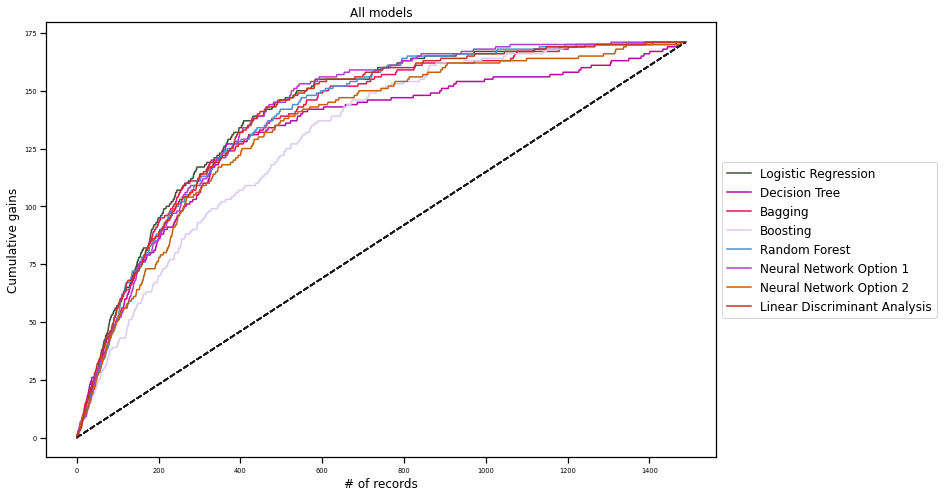

In [39]:
def modelGainsChart(model, title, ax=None):
    
    result = pd.DataFrame({
        'actual': valid_y,  # use validate set
        'prob': model.predict_proba(valid_X)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax = gainsChart(result.actual, label = title, ax=ax, figsize=[12, 8], color = color)
    ax.set_title(title)
    
    return ax



ax = modelGainsChart(logit_reg, 'Logistic Regression')
modelGainsChart(dTree, 'Decision Tree', ax)
modelGainsChart(bagging, 'Bagging', ax)
modelGainsChart(adaboost, 'Boosting', ax)
modelGainsChart(rf, 'Random Forest', ax)
modelGainsChart(gridSearch, 'Neural Network Option 1', ax)
modelGainsChart(neuralNet2, 'Neural Network Option 2', ax)
modelGainsChart(LDA, 'Linear Discriminant Analysis', ax)

ax.set_title('All models')
ax.set_xlabel('# of records')
ax.set_ylabel('Cumulative gains')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### ROC Curve

<Figure size 432x288 with 0 Axes>

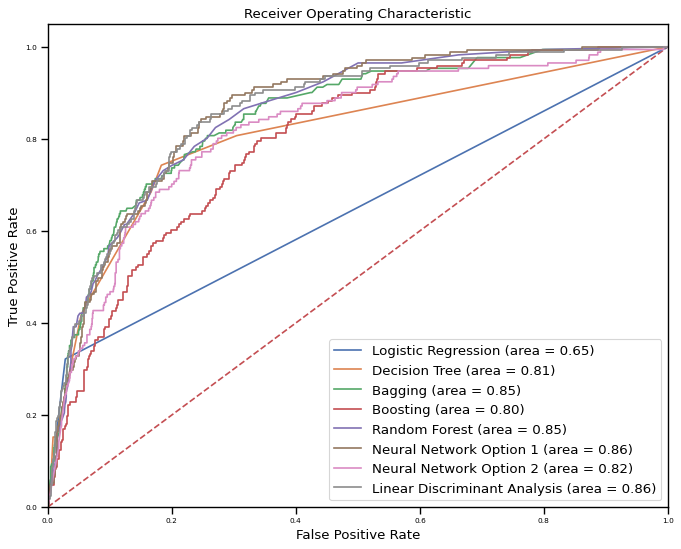

In [40]:
#Logistic Regression
probs_logit_reg = logit_reg.predict_proba(valid_X)
preds_logit_reg = probs_logit_reg[:,1]

# Decision Tree
probs_dTree = dTree.predict_proba(valid_X)
preds_dTree = probs_dTree[:,1]

#Bagging
probs_bagging = bagging.predict_proba(valid_X)
preds_bagging = probs_bagging[:,1]

#Boosting
probs_adaboost = adaboost.predict_proba(valid_X)
preds_adaboost = probs_adaboost[:,1]

# Random Forest
probs_rf = rf.predict_proba(valid_X)
preds_rf = probs_rf[:,1]

# Neural Net Option 1 
probs_neuralNet = gridSearch.predict_proba(valid_X)
preds_neuralNet = probs_neuralNet[:,1]

# Neural Net Option 2
probs_neuralNet2 = neuralNet2.predict_proba(valid_X)
preds_neuralNet2 = probs_neuralNet2[:,1]

# LDA
probs_LDA = LDA.predict_proba(valid_X)
preds_LDA = probs_LDA[:,1]


fpr1, tpr1, threshold1 = roc_curve(valid_y, logit_reg.predict(valid_X))
fpr2, tpr2, threshold2 = metrics.roc_curve(valid_y, preds_dTree)
fpr3, tpr3, threshold3 = metrics.roc_curve(valid_y, preds_bagging)
fpr4, tpr4, threshold4 = metrics.roc_curve(valid_y, preds_adaboost)
fpr5, tpr5, threshold5 = metrics.roc_curve(valid_y, preds_rf)
fpr6, tpr6, threshold6 = metrics.roc_curve(valid_y, preds_neuralNet)
fpr7, tpr7, threshold7 = metrics.roc_curve(valid_y, preds_neuralNet2)
fpr8, tpr8, threshold8 = metrics.roc_curve(valid_y, preds_LDA)


logit_reg_roc_auc = metrics.auc(fpr1, tpr1)
dTree_roc_auc = metrics.auc(fpr2, tpr2)
bagging_roc_auc = metrics.auc(fpr3, tpr3)
adaboost_roc_auc = metrics.auc(fpr4, tpr4)
rf_roc_auc = metrics.auc(fpr5, tpr5)
neuralNet_roc_auc = metrics.auc(fpr6, tpr6)
neuralNet2_roc_auc = metrics.auc(fpr7, tpr7)
LDA_roc_auc = metrics.auc(fpr8, tpr8)

plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')


plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_reg_roc_auc)
plt.plot(fpr2, tpr2, label = 'Decision Tree (area = %0.2f)' % dTree_roc_auc)
plt.plot(fpr3, tpr3, label = 'Bagging (area = %0.2f)' % bagging_roc_auc)
plt.plot(fpr4, tpr4, label = 'Boosting (area = %0.2f)' % adaboost_roc_auc)
plt.plot(fpr5, tpr5, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr6, tpr6, label = 'Neural Network Option 1 (area = %0.2f)' % neuralNet_roc_auc)
plt.plot(fpr7, tpr7, label = 'Neural Network Option 2 (area = %0.2f)' % neuralNet2_roc_auc)
plt.plot(fpr8, tpr8, label = 'Linear Discriminant Analysis (area = %0.2f)' % LDA_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Validation and Testing

#### Data Pre-Processing

Input Stepwise Regressions to determine what to drop.

In [41]:
# For Logistic Regression

print('regularization', logit_reg.C_)
print('intercept ', logit_reg.intercept_[0])
lr = pd.DataFrame({
    'coeff': logit_reg.coef_[0],
    'abs_coeff': np.abs(logit_reg.coef_[0])
}, index = predictors)
print(lr.sort_values(by=['abs_coeff'], ascending = False))

regularization [21.5443469]
intercept  -2.7175250327687177
                      coeff  abs_coeff
pdays              1.573255   1.573255
poutcome           1.450106   1.450106
duration           1.101764   1.101764
contact           -0.458323   0.458323
loan              -0.289908   0.289908
housing           -0.193215   0.193215
previous           0.159625   0.159625
education          0.143702   0.143702
marital_single     0.117746   0.117746
marital_married   -0.113558   0.113558
job_Unemployed     0.110391   0.110391
age                0.107551   0.107551
job_Self-employed -0.106616   0.106616
day                0.087905   0.087905
balance            0.085452   0.085452
month             -0.050273   0.050273
default            0.043150   0.043150
job_Employed      -0.041047   0.041047
campaign          -0.030727   0.030727
marital_divorced   0.011444   0.011444


In [42]:
train_X1 = train[predictors]
train_y1 = train[outcome]
valid_X1 = valid[predictors]
valid_y1 = valid[outcome]

In [43]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    lr = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 1000)
    return lr.fit(train_X1[variables], train_y)

def score_model(lr, variables):
    if len(variables) == 0:
        return 0
    lr_valid = lr.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in lr_valid])

lr_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
linear_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add age
Step: score=-0.89, unchanged None
['age']


In [44]:
trainD = train.loc[train.deposit == 1]
validD = valid.loc[valid.deposit == 1]
testD = test.loc[test.deposit == 1]

outcome = 'deposit'

train_X2 = trainD[predictors]
train_y2 = trainD[outcome]
valid_X2 = validD[predictors]
valid_y2 = validD[outcome]

In [45]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    model = LinearRegression()
    return model.fit(train_X1[variables], train_y1)

def score_model(model, variables):
    if len(variables) == 0:
        return mean_squared_error(train_y1, [train_y1.mean()] * len(train_y1), model)
    return mean_squared_error(train_y1, model.predict(train_X1[variables]))

model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
model_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.10, constant
Step: score=0.09, add duration
Step: score=0.08, add pdays
Step: score=0.08, add poutcome
Step: score=0.08, add contact
Step: score=0.08, add job_Unemployed
Step: score=0.08, add marital_single
Step: score=0.08, add loan
Step: score=0.08, add housing
Step: score=0.07, add previous
Step: score=0.07, add age
Step: score=0.07, add education
Step: score=0.07, add day
Step: score=0.07, add balance
Step: score=0.07, add job_Employed
Step: score=0.07, add marital_divorced
Step: score=0.07, add default
Step: score=0.07, add campaign
Step: score=0.07, add month
Step: score=0.07, add job_Self-employed
Step: score=0.07, add marital_married
Step: score=0.07, unchanged None
['duration', 'pdays', 'poutcome', 'contact', 'job_Unemployed', 'marital_sin

In [46]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    dt = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
    return dt.fit(train_X1[variables], train_y)

def score_model(dt, variables):
    if len(variables) == 0:
        return 0
    dt_valid = dt.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in dt_valid])

dt_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
dt_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, add balance
Step: score=-0.89, unchanged None
['poutcome', 'balance']


In [47]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    bg = BaggingClassifier(dTree, max_samples = 0.5, max_features = 0.5)
    return bg.fit(train_X1[variables], train_y)

def score_model(bg, variables):
    if len(variables) == 0:
        return 0
    bg_valid = bg.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in bg_valid])

bg_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
bg_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, unchanged None
['poutcome']


In [48]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    bo = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree)
    return bo.fit(train_X1[variables], train_y)

def score_model(bo, variables):
    if len(variables) == 0:
        return 0
    bo_valid = bo.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in bo_valid])

bo_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
bo_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, add education
Step: score=-0.89, unchanged None
['poutcome', 'education']


In [49]:
def train_model(variables): 
    if len(variables) == 0:
        return None
    rfc = RandomForestClassifier(n_estimators = 100, random_state = 1)
    return rfc.fit(train_X1[variables], train_y)

def score_model(rfc, variables):
    if len(variables) == 0:
        return 0
    rfc_valid = rfc.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.1 else 0 for p in rfc_valid])

rfc_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
rfc_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add poutcome
Step: score=-0.89, unchanged None
['poutcome']


In [83]:
# Random Forest had the best results and will be the final model for feature importance to determine what to keep.

from sklearn.feature_selection import SelectFromModel

# Print the name and gini importance of each feature
for feature in zip(predictors, rf.feature_importances_):
    print(feature)

train_Xr = pd.DataFrame(train_X)
# SelectFromModel help select the features whose importance 
# is greater than the mean importance of all the features by default

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(train_X, train_y)


selected_feat= train.drop(['deposit'], 1).columns[(sel.get_support())]
print()
print('The important features are: ', selected_feat)

('age', 0.012261094218741836)
('education', 0.0508659793513932)
('default', 0.0026576631110499832)
('balance', 0.16877506567883654)
('housing', 0.029341447378572905)
('loan', 0.014488470245389105)
('contact', 0.03291207365015073)
('day', 0.010303424125630034)
('month', 0.06671291090984775)
('duration', 0.3565153485125331)
('campaign', 0.0630506139846088)
('pdays', 0.014227829749776832)
('previous', 0.050199014054255364)
('poutcome', 0.05509142957474746)
('job_Employed', 0.009135289304166922)
('job_Self-employed', 0.004271198784482707)
('job_Unemployed', 0.010902435385316775)
('marital_divorced', 0.01171766228442737)
('marital_married', 0.019425257987190858)
('marital_single', 0.01714579170888179)

The important features are:  Index(['balance', 'month', 'duration', 'campaign', 'poutcome'], dtype='object')


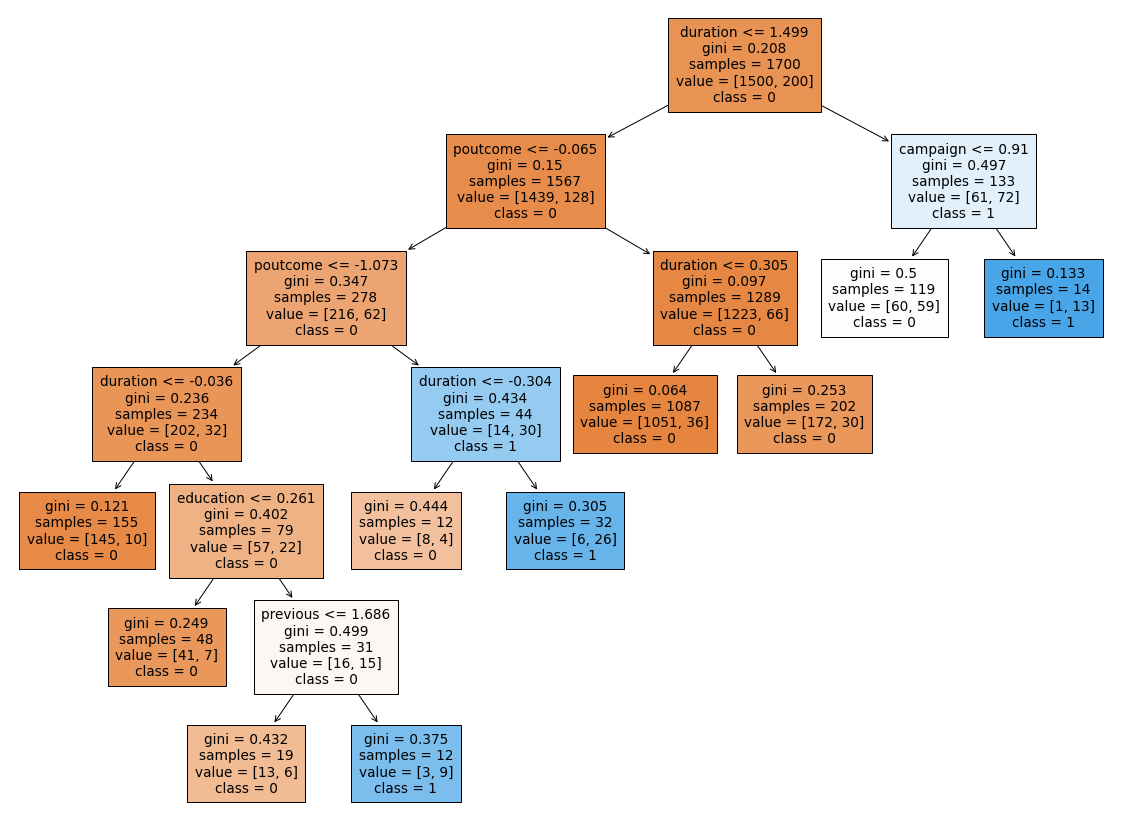

In [85]:
# plot Classification Tree to see what features are used

from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dTree,
          feature_names = train.drop(['deposit'], 1).columns, 
          class_names = train_y.astype(str).unique(),
          filled=True
          )
plt.show()

Based on the stepwise regressions, the following variables will be dropped: `age`, `default`, `housing`, `loan`, `contact`, `day`, `pdays`, `previous`, `job_Employed`, `job_Self-employed`, `job_Unemployed`, `marital_divorced`, `marital_married`, and `marital_single`.

#### Balance Dataset

The dataset is slightly imbalanced. We re-balanced the dataset to see if it would be helpful in improving the metrics. Based on the results, it shows that the balancing of the dataset did not prove to be beneficial, therefore the dataset will not be balanced.

In [52]:
bank['deposit'].value_counts()

0    4000
1     521
Name: deposit, dtype: int64

In [53]:
train.deposit.value_counts()

0    1500
1     200
Name: deposit, dtype: int64

In [54]:
to_resample = train.loc[train['deposit'] == 1]

In [55]:
# Rebalanced from 11% to 30%

our_resample = to_resample.sample(n = 442, replace = True)

In [56]:
train_rebal = pd.concat([train, our_resample])

train_rebal['deposit'].value_counts()

0    1500
1     642
Name: deposit, dtype: int64

In [57]:
train_XR = train_rebal[predictors]
train_yR = train_rebal[outcome]



logit_reg_rebal = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg_rebal.fit(train_XR, train_yR)
confusionMatrices(logit_reg_rebal, 'Logistic regression')

rf_rebal = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_rebal.fit(train_XR, train_yR)
confusionMatrices(rf_rebal, 'Random Forest Classifier')

param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet_rebal = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch_rebal = GridSearchCV(neuralNet_rebal, param_grid, cv = 5, n_jobs = -1)
gridSearch_rebal.fit(train_XR, train_yR)
neuralNet_rebal = gridSearch_rebal.best_estimator_

confusionMatrices(neuralNet_rebal, 'Neural Network')

Logistic regression - training results
Confusion Matrix (Accuracy 0.8035)

       Prediction
Actual    0    1
     0 1279  221
     1  113   87
Logistic regression - validation results
Confusion Matrix (Accuracy 0.7802)

       Prediction
Actual    0    1
     0 1096  221
     1  106   65
Random Forest Classifier - training results
Confusion Matrix (Accuracy 0.8824)

       Prediction
Actual    0    1
     0 1500    0
     1  200    0
Random Forest Classifier - validation results
Confusion Matrix (Accuracy 0.8851)

       Prediction
Actual    0    1
     0 1317    0
     1  171    0
Neural Network - training results
Confusion Matrix (Accuracy 0.8529)

       Prediction
Actual    0    1
     0 1425   75
     1  175   25
Neural Network - validation results
Confusion Matrix (Accuracy 0.8481)

       Prediction
Actual    0    1
     0 1236   81
     1  145   26


In [58]:
def accuracy(model_rebal):
    
    accuracy_train_rebal = accuracy_score(train_yR, model_rebal.predict(train_XR))
    
    return round(accuracy_train_rebal,3)

print('Accuracy score for Rebalanced Logistic Regression is:', accuracy(logit_reg_rebal))
print('Accuracy score for Rebalanced Neural Network is:', accuracy(neuralNet_rebal))

Accuracy score for Rebalanced Logistic Regression is: 0.831
Accuracy score for Rebalanced Neural Network is: 0.851


In [59]:
def f1(model_rebal):
    
    f1_train_rebal = f1_score(train_yR, model_rebal.predict(train_XR), average = 'weighted')
    
    return round(f1_train_rebal,2)

print('F1 score for Rebalanced Logistic Regression is:', f1(logit_reg_rebal))
print('F1 score for Rebalanced Neural Network is:', f1(gridSearch_rebal))

F1 score for Rebalanced Logistic Regression is: 0.83
F1 score for Rebalanced Neural Network is: 0.85


In [60]:
# To see if the rebalancing would change the stepwise regression.

def train_model(variables): 
    if len(variables) == 0:
        return None
    logit_reg_rebal = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
    return logit_reg_rebal.fit(train_XR[variables], train_yR)

def score_model(lr, variables):
    if len(variables) == 0:
        return 0
    lr_valid = lr.predict(valid_X1[variables])
    return -accuracy_score(valid_y1, [1 if p > 0.5 else 0 for p in lr_valid])

logit_reg_rebal_model, best_variables = stepwise_selection(predictors, train_model, score_model, direction = 'forward', verbose = True)

print(best_variables)
logit_reg_rebal_predictors = best_variables

Variables: age, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, job_Employed, job_Self-employed, job_Unemployed, marital_divorced, marital_married, marital_single
Start: score=0.00, constant
Step: score=-0.89, add education
Step: score=-0.89, unchanged None
['education']


### Results and Final Model Selection

In [63]:
final_predictiors = ['education', 'duration', 'campaign', 'poutcome']

test_X = test[final_predictiors]
test_y = test['deposit']

# standardize the data
test_X_norm = StandardScaler().fit_transform(test_X)

In [64]:
# ConfusionMatrics Functions for test set

def confusionMatrices(model, title):
    print(title + ' - test results')
    test_pred = model.predict(test_X)
    classificationSummary(test_y, test_pred)

In [65]:
# Logistic Regression

logit_reg_test = LogisticRegressionCV(penalty="l2", solver='lbfgs', cv = 5, max_iter = 5000)
logit_reg_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(logit_reg_test, 'Logistic regression'))


# Classification Tree

dTree_test = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 30, max_leaf_nodes = 10)
dTree_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(dTree_test, 'Decision Tree'))


# Bagging

bagging_test = BaggingClassifier(dTree_test, max_samples = 0.5, max_features = 0.5)
bagging_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(bagging_test, 'Bagged Decision Tree'))


# Adaboost

adaboost_test = AdaBoostClassifier(n_estimators = 100, base_estimator = dTree_test)
adaboost_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(adaboost_test, 'Boosted Decision Tree'))

# Random Forest

rf_test = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(rf_test, 'Random Forest Classifier'))


# Neural Network -- Option 1

param_grid = {
    'hidden_layer_sizes': list(range(2, 10)),
}
neuralNet1_test = MLPClassifier(activation = 'logistic', solver = 'lbfgs', random_state = 1, max_iter = 5000)

gridSearch_test = GridSearchCV(neuralNet1_test, param_grid, cv = 5, n_jobs = -1)
gridSearch_test.fit(test_X_norm, test_y)
neuralNet1_test = gridSearch_test.best_estimator_

print()
print(confusionMatrices(gridSearch_test, 'Neural Network -- Option 1'))


# Neural Network -- Option 2

scaleInput_test = MinMaxScaler()
scaleInput_test.fit(test_X_norm * 1.0)

neuralNet2_test = MLPClassifier(hidden_layer_sizes = (10), activation = 'logistic', solver = 'lbfgs', max_iter = 5000,
                          random_state = 1)
neuralNet2_test.fit(scaleInput_test.transform(test_X_norm), test_y)

print()
print('Neural Network -- Option 2 - test results')
print(classificationSummary(test_y, neuralNet2_test.predict(scaleInput_test.transform(test_X_norm))))


# Linear Discriminant Analysis

LDA_test = LinearDiscriminantAnalysis()
LDA_test.fit(test_X_norm, test_y)

print()
print(confusionMatrices(LDA_test, 'Linear Discriminant Analysis'))


Logistic regression - test results
Confusion Matrix (Accuracy 0.1170)

       Prediction
Actual    0    1
     0    6 1177
     1    0  150
None

Decision Tree - test results
Confusion Matrix (Accuracy 0.1125)

       Prediction
Actual    0    1
     0    0 1183
     1    0  150
None

Bagged Decision Tree - test results
Confusion Matrix (Accuracy 0.8875)

       Prediction
Actual    0    1
     0 1183    0
     1  150    0
None

Boosted Decision Tree - test results
Confusion Matrix (Accuracy 0.1125)

       Prediction
Actual    0    1
     0    0 1183
     1    0  150
None

Random Forest Classifier - test results
Confusion Matrix (Accuracy 0.2903)

       Prediction
Actual   0   1
     0 272 911
     1  35 115
None

Neural Network -- Option 1 - test results
Confusion Matrix (Accuracy 0.1253)

       Prediction
Actual    0    1
     0   17 1166
     1    0  150
None

Neural Network -- Option 2 - test results
Confusion Matrix (Accuracy 0.9205)

       Prediction
Actual    0    1
     0 

In [66]:
def accuracy_test(model):
    
    accuracy_test_test = accuracy_score(test_y, model.predict(test_X_norm))
    
    return round(accuracy_test_test,3)

print('accuracy_test score for Logistic Regression is:', accuracy_test(logit_reg_test))
print('accuracy_test score for Decision Tree is:', accuracy_test(dTree_test))
print('accuracy_test score for Bagging is:', accuracy_test(bagging_test))
print('accuracy_test score for Boosting is:', accuracy_test(adaboost_test))
print('accuracy_test score for Random Forest is:', accuracy_test(rf_test))
print('accuracy_test score for Neural Network Option 1 is:', accuracy_test(gridSearch_test))
print('accuracy_test score for Neural Network Option 2 is:', accuracy_test(neuralNet2_test))
print('accuracy_test score for Linear Discriminant Analysis is:', accuracy_test(LDA_test))

accuracy_test score for Logistic Regression is: 0.89
accuracy_test score for Decision Tree is: 0.905
accuracy_test score for Bagging is: 0.889
accuracy_test score for Boosting is: 0.992
accuracy_test score for Random Forest is: 0.992
accuracy_test score for Neural Network Option 1 is: 0.904
accuracy_test score for Neural Network Option 2 is: 0.644
accuracy_test score for Linear Discriminant Analysis is: 0.891


In [67]:
def f1_test(model):
    
    f1_test = f1_score(test_y, model.predict(test_X_norm), average = 'weighted')
    
    return round(f1_test,3)

print('F1 score for Logistic Regression is:', f1_test(logit_reg_test))
print('F1 score for Decision Tree is:', f1_test(dTree_test))
print('F1 score for Bagging is:', f1_test(bagging_test))
print('F1 score for Boosting is:', f1_test(adaboost_test))
print('F1 score for Random Forest is:', f1_test(rf_test))
print('F1 score for Neural Network Option 1 is:', f1_test(gridSearch_test))
print('F1 score for Neural Network Option 2 is:', f1_test(neuralNet2_test))
print('F1 score for Linear Discriminant Analysis is:', f1_test(LDA_test))

F1 score for Logistic Regression is: 0.865
F1 score for Decision Tree is: 0.891
F1 score for Bagging is: 0.838
F1 score for Boosting is: 0.992
F1 score for Random Forest is: 0.992
F1 score for Neural Network Option 1 is: 0.881
F1 score for Neural Network Option 2 is: 0.704
F1 score for Linear Discriminant Analysis is: 0.875


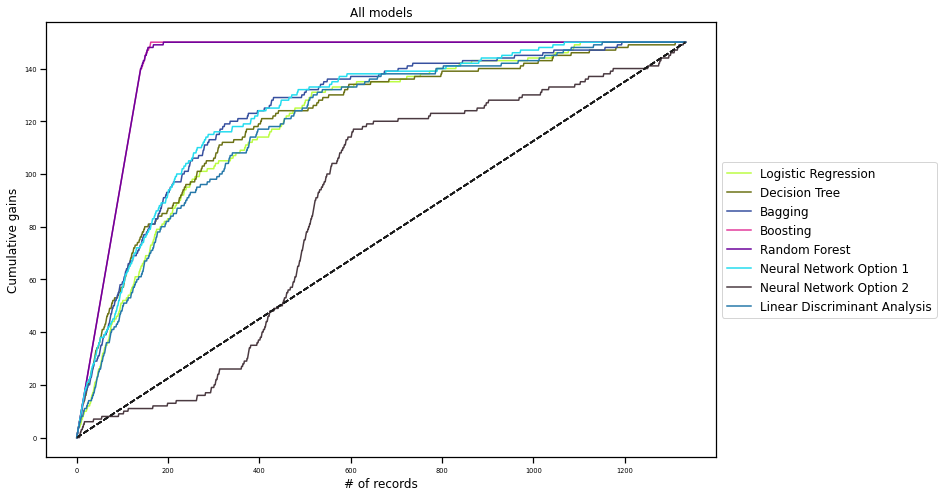

In [68]:
def modelGainsChart(model, title, ax=None):
    
    result = pd.DataFrame({
        'actual': test_y,  # use validate set
        'prob': model.predict_proba(test_X_norm)[:, 1]
    })

    result = result.sort_values(by=['prob'], ascending=False).reset_index(drop=True)
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax = gainsChart(result.actual, label = title, ax=ax, figsize=[12, 8], color = color)
    ax.set_title(title)
    
    return ax



ax = modelGainsChart(logit_reg_test, 'Logistic Regression')
modelGainsChart(dTree_test, 'Decision Tree', ax)
modelGainsChart(bagging_test, 'Bagging', ax)
modelGainsChart(adaboost_test, 'Boosting', ax)
modelGainsChart(rf_test, 'Random Forest', ax)
modelGainsChart(gridSearch_test, 'Neural Network Option 1', ax)
modelGainsChart(neuralNet2_test, 'Neural Network Option 2', ax)
modelGainsChart(LDA_test, 'Linear Discriminant Analysis', ax)

ax.set_title('All models')
ax.set_xlabel('# of records')
ax.set_ylabel('Cumulative gains')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Figure size 432x288 with 0 Axes>

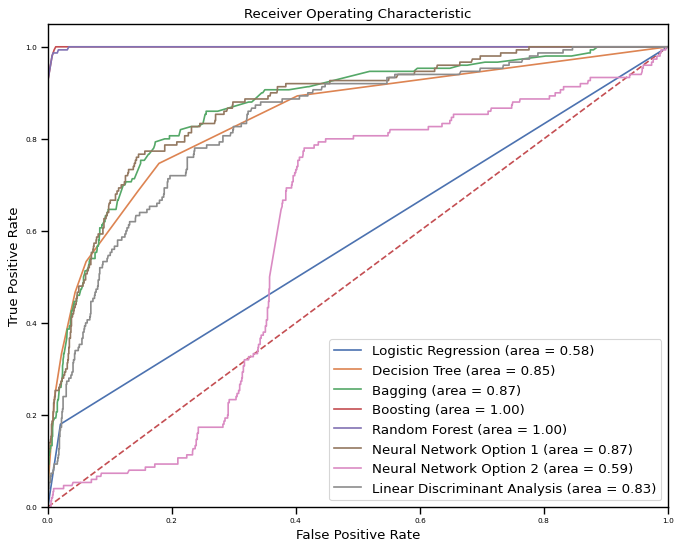

In [69]:
#Logistic Regression
probs_logit_reg_test = logit_reg_test.predict_proba(test_X_norm)
preds_logit_reg_test = probs_logit_reg_test[:,1]

# Decision Tree
probs_dTree_test = dTree_test.predict_proba(test_X_norm)
preds_dTree_test = probs_dTree_test[:,1]

#Bagging
probs_bagging_test = bagging_test.predict_proba(test_X_norm)
preds_bagging_test = probs_bagging_test[:,1]

#Boosting
probs_adaboost_test = adaboost_test.predict_proba(test_X_norm)
preds_adaboost_test = probs_adaboost_test[:,1]

# Random Forest
probs_rf_test = rf_test.predict_proba(test_X_norm)
preds_rf_test = probs_rf_test[:,1]

# Neural Net Option 1 
probs_neuralNet_test = gridSearch_test.predict_proba(test_X_norm)
preds_neuralNet_test = probs_neuralNet_test[:,1]

# Neural Net Option 2
probs_neuralNet2_test = neuralNet2_test.predict_proba(test_X_norm)
preds_neuralNet2_test = probs_neuralNet2_test[:,1]

# LDA
probs_LDA_test = LDA_test.predict_proba(test_X_norm)
preds_LDA_test = probs_LDA_test[:,1]


fpr1, tpr1, threshold1 = roc_curve(test_y, logit_reg_test.predict(test_X_norm))
fpr2, tpr2, threshold2 = metrics.roc_curve(test_y, preds_dTree_test)
fpr3, tpr3, threshold3 = metrics.roc_curve(test_y, preds_bagging_test)
fpr4, tpr4, threshold4 = metrics.roc_curve(test_y, preds_adaboost_test)
fpr5, tpr5, threshold5 = metrics.roc_curve(test_y, preds_rf_test)
fpr6, tpr6, threshold6 = metrics.roc_curve(test_y, preds_neuralNet_test)
fpr7, tpr7, threshold7 = metrics.roc_curve(test_y, preds_neuralNet2_test)
fpr8, tpr8, threshold8 = metrics.roc_curve(test_y, preds_LDA_test)


logit_reg_roc_auc = metrics.auc(fpr1, tpr1)
dTree_roc_auc = metrics.auc(fpr2, tpr2)
bagging_roc_auc = metrics.auc(fpr3, tpr3)
adaboost_roc_auc = metrics.auc(fpr4, tpr4)
rf_roc_auc = metrics.auc(fpr5, tpr5)
neuralNet_roc_auc = metrics.auc(fpr6, tpr6)
neuralNet2_roc_auc = metrics.auc(fpr7, tpr7)
LDA_roc_auc = metrics.auc(fpr8, tpr8)

plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')


plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % logit_reg_roc_auc)
plt.plot(fpr2, tpr2, label = 'Decision Tree (area = %0.2f)' % dTree_roc_auc)
plt.plot(fpr3, tpr3, label = 'Bagging (area = %0.2f)' % bagging_roc_auc)
plt.plot(fpr4, tpr4, label = 'Boosting (area = %0.2f)' % adaboost_roc_auc)
plt.plot(fpr5, tpr5, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr6, tpr6, label = 'Neural Network Option 1 (area = %0.2f)' % neuralNet_roc_auc)
plt.plot(fpr7, tpr7, label = 'Neural Network Option 2 (area = %0.2f)' % neuralNet2_roc_auc)
plt.plot(fpr8, tpr8, label = 'Linear Discriminant Analysis (area = %0.2f)' % LDA_roc_auc)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [86]:
# compare predictions to the true records

final_pred = rf_test.predict(test_X)

test['Final Predictions'] = final_pred

# count of "0" in the test set
count_0_true = (test['deposit'] == 0).sum()

# count of "0" predicted
count_0_pred = (test['Final Predictions'] == 0).sum()


# count of "1" in the test set
count_1_true = (test['deposit'] == 1).sum()

# count of "1" in prediction
count_1_pred = (test['Final Predictions'] == 1).sum()

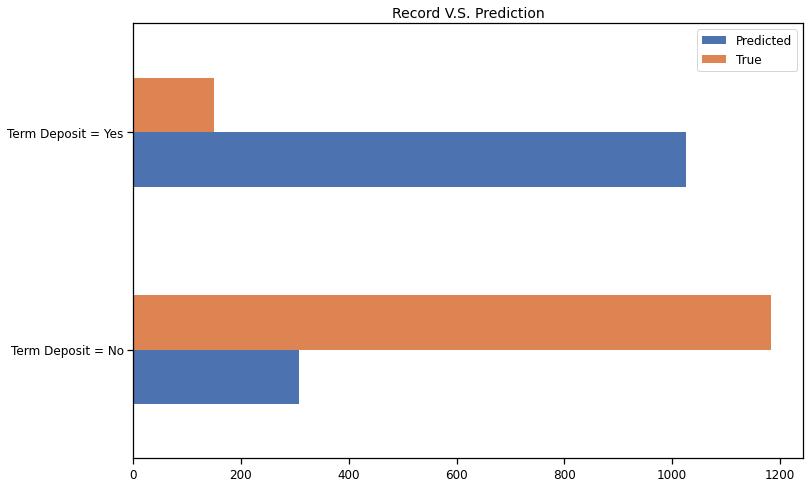

In [71]:
# use horizontal barchart to visualize the difference

predict = [count_0_pred, count_1_pred]
true = [count_0_true, count_1_true]
index = ['Term Deposit = No', 'Term Deposit = Yes']
df = pd.DataFrame({'Predicted': predict,
                   'True': true}, index=index)



ax = df.plot.barh(figsize=[12, 8], fontsize=12)
ax.set_title('Record V.S. Prediction', fontsize=14)
leg = ax.legend()

In [132]:
dict = {'' : ['Records', 'Predictions'],
        'Successful Term Deposit' : [150, 1026],
        'No Term Deposit' : [1183, 307]}
df = pd.DataFrame(dict)

In [158]:
df.style.set_properties(**{'border': '1.3px solid black',
                          'color': 'black',
                          'background-color': 'white'}).hide_index()


,Successful Term Deposit,No Term Deposit
Records,150,1183
Predictions,1026,307


### Discussion and Conclusions

The Random Forest model, which was the final model selected to implement, resulted in a 30% reduction to labor and expenses while maintaining the 11% precision of the dataset. This model also retains 77% recall of the customers who would subscribe to a term deposit if contacted during a campaign. While this model allows the bank to decrease their expenses and labor associated with these marketing campaigns with low impact to the success rate of calls, the bank will need to continue to collect data on future campaigns so the model can continue to be retrained with recent data. Furthermore, additional data collection moving forward would allow the company to retrain and test the models explored in this study with a more balanced dataset. As the data was unbalanced, with only 11.5% positive response outcomes, without sampling a stratified random sample of the dataset that has equal record for each outcome, the model selection was limited to models that perform well with unbalanced data. Concerns with the stratified random sample being too small prevented this technique from being used in this study but could be implemented in the future with a larger dataset.